C:\Users\bough\AppData\Local\Temp\ipykernel_20160\2083397619.py:52: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  training = np.array(training)


Epoch 1/200
2/2 [==============================] - 3s 11ms/step - loss: 3.1418 - accuracy: 0.0676
Epoch 2/200
2/2 [==============================] - 0s 11ms/step - loss: 3.1587 - accuracy: 0.0541
Epoch 3/200
2/2 [==============================] - 0s 9ms/step - loss: 3.1363 - accuracy: 0.0541
Epoch 4/200
2/2 [==============================] - 0s 11ms/step - loss: 3.1177 - accuracy: 0.0676
Epoch 5/200
2/2 [==============================] - 0s 9ms/step - loss: 3.0514 - accuracy: 0.0946
Epoch 6/200
2/2 [==============================] - 0s 9ms/step - loss: 3.0403 - accuracy: 0.0676
Epoch 7/200
2/2 [==============================] - 0s 12ms/step - loss: 2.9946 - accuracy: 0.0946
Epoch 8/200
2/2 [==============================] - 0s 9ms/step - loss: 2.9520 - accuracy: 0.2027
Epoch 9/200
2/2 [==============================] - 0s 10ms/step - loss: 2.9632 - accuracy: 0.0946
Epoch 10/200
2/2 [==============================] - 0s 9ms/step - loss: 2.9310 - accuracy: 0.1622
Epoch 11/200
2/2 [======

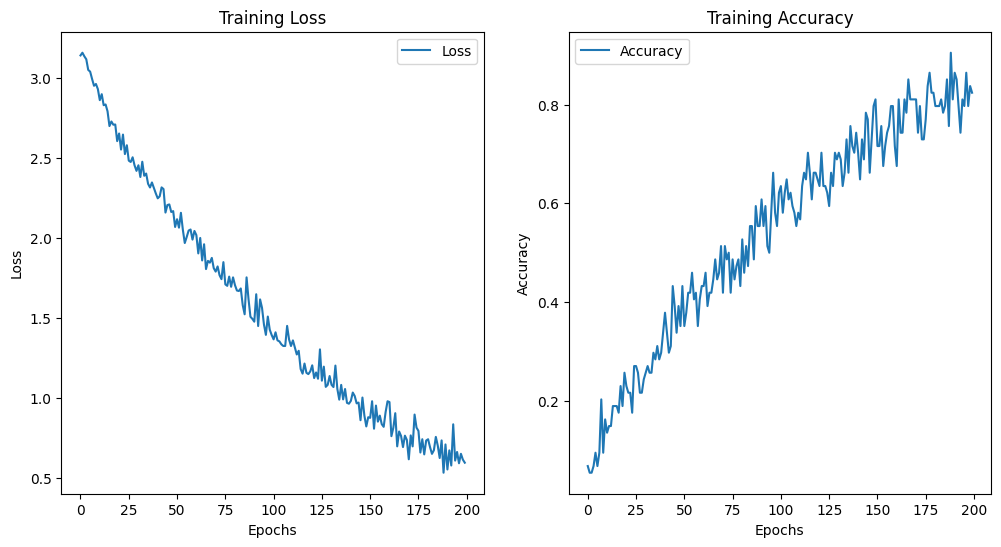

In [1]:
import random 
import json
import pickle 
import numpy as np
import nltk
from nltk.stem import WordNetLemmatizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.optimizers import SGD
import matplotlib.pyplot as plt

lemmatizer = WordNetLemmatizer()
intents = json.loads(open('intents.json').read())

words = []
classes = []
documents = []
ignore_letters = ['?', '!', '.', ',']

for intent in intents['intents']:
    for pattern in intent['patterns']:
        word_list = nltk.word_tokenize(pattern)
        documents.append((word_list, intent['tag']))
        for word in word_list:
            if word not in ignore_letters:
                words.append(word)
        if intent['tag'] not in classes:  
            classes.append(intent['tag'])

words = [lemmatizer.lemmatize(word.lower()) for word in words]  
words = sorted(set(words))
classes = sorted(set(classes))

pickle.dump(words, open('words.pkl', 'wb'))
pickle.dump(classes, open('classes.pkl', 'wb'))

training = []
output_empty = [0] * len(classes)

for document in documents:
    bag = []
    word_patterns = document[0]
    word_patterns = [lemmatizer.lemmatize(word.lower()) for word in word_patterns]
    for word in words:
        bag.append(1) if word in word_patterns else bag.append(0)
    
    output_row = list(output_empty)
    output_row[classes.index(document[1])] = 1  
    training.append([bag, output_row])

random.shuffle(training)
training = np.array(training)

train_x = list(training[:, 0])
train_y = list(training[:, 1])

model = Sequential()
model.add(Input(shape=(len(train_x[0]),)) )  
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(len(train_y[0]), activation='softmax'))

sgd = SGD(learning_rate=0.01, momentum=0.9, nesterov=True)  
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

history = model.fit(np.array(train_x), np.array(train_y), epochs=200, batch_size=45, verbose=1)
model.save('chatbot.h5')
print('done')

plt.figure(figsize=(12, 6))

# Loss plot
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.legend()

# Accuracy plot
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training Accuracy')
plt.legend()

plt.show()


In [ ]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')


In [ ]:
import nltk
nltk.download()


In [1]:
import tensorflow as tf
print(tf.__version__)


2.10.1


: 